<a href="https://colab.research.google.com/github/tanishq150802/Covid-related-Tweets-Sentiment-Analysis/blob/main/NLPchallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
DATASET_ENCODING = "ISO-8859-1"
df_train = pd.read_csv('/content/drive/MyDrive/NLP covid/NLP covid/Pandemic_NLP_train.csv', encoding=DATASET_ENCODING,)
df_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/NLP covid/NLP covid/Pandemic_NLP_test.csv', encoding=DATASET_ENCODING,)
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [ ]:
df_train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
df_train.dtypes

UserName         float64
ScreenName       float64
Location          object
TweetAt           object
OriginalTweet     object
Sentiment         object
dtype: object

In [ ]:
df_train['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
df_train['Sentiment'].nunique()

5

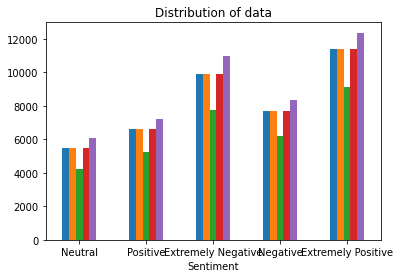

In [ ]:
# Plotting the distribution for dataset.
ax = df_train.groupby('Sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Neutral', 'Positive', 'Extremely Negative',
       'Negative', 'Extremely Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df_train['OriginalTweet']), list(df_train['Sentiment'])

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_train['Sentiment']= label_encoder.fit_transform(df_train['Sentiment'])
 
df_train.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751.0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,3800.0,48752.0,UK,16-03-2020,advice Talk to your neighbours family to excha...,4
2,3801.0,48753.0,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,4
3,3802.0,48754.0,NaN,16-03-2020,My food stock is not the only one which is emp...,4
4,3803.0,48755.0,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
5,3804.0,48756.0,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,4
6,3805.0,48757.0,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,4
7,3806.0,48758.0,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,3
8,3807.0,48759.0,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,4
9,3808.0,48760.0,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",2


In [ ]:
df_test['Sentiment']= label_encoder.fit_transform(df_test['Sentiment'])
 
df_test.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,4
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,1
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,2
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,3
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,3
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,4
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We canÂt stop #COVID19 without pro...",3
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,0
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,1


In [ ]:
df_train['Sentiment'].unique()

array([3, 4, 0, 2, 1])

In [ ]:
# data_pos = df_train[df_train['Sentiment'] == 4]
# data_neg = df_train[df_train['Sentiment'] == 2]
# data_epos = df_train[df_train['Sentiment'] == 1]
# data_eneg = df_train[df_train['Sentiment'] == 0]
# data_neu = df_train[df_train['Sentiment'] == 3]

In [ ]:
sub=pd.read_csv('/content/drive/MyDrive/NLP covid/NLP covid/submission_.csv')
sub['OriginalTweet']=sub['OriginalTweet'].str.lower()
sub['OriginalTweet'].tail()
df_train['OriginalTweet']=df_train['OriginalTweet'].str.lower()
df_train['OriginalTweet'].tail()

df_test['OriginalTweet']=df_test['OriginalTweet'].str.lower()
df_test['OriginalTweet'].tail()
sub

,OriginalTweet,Sentiment
0,trending: new yorkers encounter empty supermar...,NaN
1,when i couldn't find hand sanitizer at fred me...,NaN
2,find out how you can protect yourself and love...,NaN
3,#panic buying hits #newyork city as anxious sh...,NaN
4,#toiletpaper #dunnypaper #coronavirus #coronav...,NaN
...,...,...
3793,meanwhile in a supermarket in israel -- people...,NaN
3794,did you panic buy a lot of non-perishable item...,NaN
3795,asst prof of economics @cconces was on @nbcphi...,NaN
3796,gov need to do somethings instead of biar je r...,NaN


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
sub['OriginalTweet'] = sub['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
df_train['OriginalTweet'].head()

0    @menyrbie @phil_gahan @chrisitv https://t.co/i...
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    food stock not one empty... please, don't pani...
4    me, ready go supermarket #covid19 outbreak. no...
Name: OriginalTweet, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ', data)
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x: cleaning_URLs(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x: cleaning_URLs(x))
sub['OriginalTweet'] = sub['OriginalTweet'].apply(lambda x: cleaning_URLs(x))
df_train['OriginalTweet'].head()

0    @menyrbie @phil_gahan @chrisitv  s://t.co/xx6g...
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    food stock not one empty... please, don't pani...
4    me, ready go supermarket #covid19 outbreak. no...
Name: OriginalTweet, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df_train['OriginalTweet']= df_train['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))
df_test['OriginalTweet']= df_test['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))
sub['OriginalTweet']= sub['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))
df_train['OriginalTweet'].head()

0        menyrbie philgahan chrisitv  stcoxx6ghgfzcc  
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock not one empty please dont panic eno...
4    me ready go supermarket covid19 outbreak not i...
Name: OriginalTweet, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))
sub['OriginalTweet'] = sub['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))
df_train['OriginalTweet'].head()

0        menyrbie philgahan chrisitv  stcoxx6ghgfzcc  
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock not one empty please dont panic eno...
4    me ready go supermarket covi19 outbreak not im...
Name: OriginalTweet, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x: cleaning_numbers(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x: cleaning_numbers(x))
sub['OriginalTweet'] = sub['OriginalTweet'].apply(lambda x: cleaning_numbers(x))
df_train['OriginalTweet'].head()

0         menyrbie philgahan chrisitv  stcoxxghgfzcc  
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock not one empty please dont panic eno...
4    me ready go supermarket covi outbreak not im p...
Name: OriginalTweet, dtype: object

In [ ]:
df_train.dtypes

UserName         float64
ScreenName       float64
Location          object
TweetAt           object
OriginalTweet     object
Sentiment          int64
dtype: object

In [ ]:
# import nltk
# nltk.download('wordnet')
# lm = nltk.WordNetLemmatizer()
# def lemmatizer_on_text(data):
#     text = [lm.lemmatize(word) for word in data]
#     return data
# df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x: lemmatizer_on_text(x))
# df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x: lemmatizer_on_text(x))
# sub['OriginalTweet'] = sub['OriginalTweet'].apply(lambda x: lemmatizer_on_text(x))
# df_train['OriginalTweet'].head()

In [ ]:
import nltk #better to do just stemming here, concluded this after hours of training.
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_train['OriginalTweet']= df_train['OriginalTweet'].apply(lambda x: stemming_on_text(x))
df_test['OriginalTweet']= df_test['OriginalTweet'].apply(lambda x: stemming_on_text(x))
sub['OriginalTweet']= sub['OriginalTweet'].apply(lambda x: stemming_on_text(x))
df_train['OriginalTweet'].head()

0         menyrbie philgahan chrisitv  stcoxxghgfzcc  
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock not one empty please dont panic eno...
4    me ready go supermarket covi outbreak not im p...
Name: OriginalTweet, dtype: object

In [ ]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df_train['OriginalTweet'].values)
X_learn = tokenizer.texts_to_sequences(df_train['OriginalTweet'].values)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
X_work = tokenizer.texts_to_sequences(df_test['OriginalTweet'].values)
X_sol = tokenizer.texts_to_sequences(sub['OriginalTweet'].values)
X_learn = pad_sequences(X_learn)
X_work = pad_sequences(X_work)
X_sol = pad_sequences(X_sol)
X_learn[1].shape

(29,)

In [ ]:
embeddings_index = dict()
f = open('/content/drive/MyDrive/NLP covid/NLP covid/glove.6B.200d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.random.random((len(word_index)+1,200))
for word, i in word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 200,weights=[embedding_matrix], input_shape = X_learn[1].shape))
model.add(SpatialDropout1D(0.002))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(80,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
# embed_dim = 128
# lstm_out = 200
# batch_size = 32

# model = Sequential()
# model.add(Embedding(2000, embed_dim,input_length = X_learn.shape[1]))
# model.add(SpatialDropout1D(0.01))
# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(5,activation='softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
# print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 29, 200)           14007400  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 29, 200)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 29, 100)           120400    
_________________________________________________________________
lstm_8 (LSTM)                (None, 29, 80)            57920     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 255       
Total params: 14,212,175
Trainable params: 14,212,175
Non-trainable params: 0
__________________________________________

In [ ]:
y_learn=pd.get_dummies(df_train['Sentiment'])
y_learn

In [ ]:
batch_size=32
model.fit(X_learn, y_learn, epochs =20,steps_per_epoch=500, batch_size=batch_size, verbose = 'auto')

Epoch 1/20
500/500 [==============================] - 16s 32ms/step - loss: 0.5921 - accuracy: 0.7827
Epoch 2/20
500/500 [==============================] - 16s 31ms/step - loss: 0.6284 - accuracy: 0.7672
Epoch 3/20
500/500 [==============================] - 16s 31ms/step - loss: 0.6187 - accuracy: 0.7717
Epoch 4/20
500/500 [==============================] - 16s 31ms/step - loss: 0.5006 - accuracy: 0.8181
Epoch 5/20
500/500 [==============================] - 16s 31ms/step - loss: 0.5431 - accuracy: 0.8041
Epoch 6/20
500/500 [==============================] - 16s 31ms/step - loss: 0.5137 - accuracy: 0.8128
Epoch 7/20
500/500 [==============================] - 16s 31ms/step - loss: 0.4479 - accuracy: 0.8406
Epoch 8/20
500/500 [==============================] - 16s 32ms/step - loss: 0.4812 - accuracy: 0.8239
Epoch 9/20
500/500 [==============================] - 16s 32ms/step - loss: 0.4167 - accuracy: 0.8558
Epoch 10/20
500/500 [==============================] - 16s 31ms/step - loss: 0.373

In [ ]:
y_sol=model.predict(X_sol)
y_pred=np.argmax(y_sol,axis=1)
y_pred

array([0, 4, 1, ..., 3, 0, 1])

In [ ]:
DF = pd.DataFrame(y_pred)
#DF[].replace({"3": "Neutral", "4": "Positive", "2": "Negative","1": "Extremely Positive","0": "Extremely Negative"}, inplace=True)
DF

,0
0,0
1,4
2,1
3,2
4,3
...,...
3793,4
3794,2
3795,3
3796,0


In [ ]:
ans=pd.read_csv('/content/drive/MyDrive/NLP covid/NLP covid/submission_.csv')
ans['Sentiment']=y_pred
ans['Sentiment'] = ans['Sentiment'].map({3: "Neutral", 4: "Positive", 2: "Negative",1: "Extremely Positive",0: "Extremely Negative"})
ans

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [ ]:
ans.to_csv('ans.csv', header=True, index=False)

In [ ]:
# df_train["OriginalTweet"]=df_train["OriginalTweet"].values.astype(str)
# df_test["OriginalTweet"]=df_test["OriginalTweet"].values.astype(str)
# df_train.head(3)

In [ ]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
# df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(tokenizer.tokenize)
# df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(tokenizer.tokenize)
# df_train['OriginalTweet'].head()

In [ ]:
# df_train['OriginalTweet']=[" ".join(review) for review in df_train['OriginalTweet'].values]
# df_test['OriginalTweet']=[" ".join(review) for review in df_test['OriginalTweet'].values]

In [ ]:
# vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
# vectoriser.fit_transform(df_train["OriginalTweet"])
# print('No. of feature_words: ', len(vectoriser.get_feature_names()))